In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [23]:
X_train[0].shape

(28, 28)

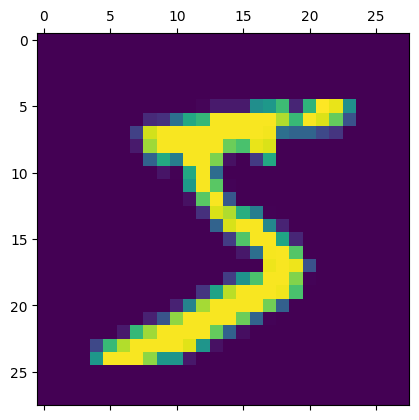

In [24]:
plt.matshow(X_train[0])

In [25]:
y_train[0]

5

In [26]:
X_train_flattern = X_train.reshape(len(X_train),28*28)
X_test_flattern = X_test.reshape(len(X_test),28*28)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(192,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(86,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2220 - accuracy: 0.9341
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0906 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0623 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9814


[0.08183806389570236, 0.9814000129699707]

In [29]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[8.9922614e-05, 6.9610390e-04, 1.1537640e-03, ..., 1.0000000e+00,
        2.5768476e-02, 7.6740330e-01],
       [6.0786599e-05, 9.8474681e-01, 1.0000000e+00, ..., 3.2487293e-05,
        2.8821149e-01, 8.4229745e-10],
       [5.4486600e-06, 9.9999642e-01, 2.0596191e-01, ..., 1.2095149e-01,
        1.5922154e-01, 8.4600055e-05],
       ...,
       [1.6623018e-08, 3.3564679e-02, 4.2144052e-06, ..., 8.3625519e-01,
        1.1685593e-03, 2.9578021e-01],
       [1.6146064e-04, 2.5128877e-06, 5.0507456e-06, ..., 2.0157337e-05,
        9.7442448e-01, 8.7524036e-08],
       [5.5457758e-06, 3.3959564e-05, 1.1610065e-07, ..., 6.2342260e-09,
        2.8320967e-06, 3.3696061e-08]], dtype=float32)

In [30]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    0,    1,    3,    1,    1,    0],
       [   1, 1125,    0,    1,    0,    1,    4,    1,    2,    0],
       [   2,    0, 1017,    1,    1,    0,    1,    5,    4,    1],
       [   0,    0,    4,  981,    0,    9,    0,    4,    5,    7],
       [   1,    0,    3,    0,  967,    0,    2,    1,    0,    8],
       [   3,    0,    0,    7,    1,  865,    8,    1,    4,    3],
       [   2,    2,    3,    1,    3,    2,  943,    0,    2,    0],
       [   2,    3,    8,    0,    2,    0,    0, 1008,    1,    4],
       [   2,    0,    1,    2,    3,    1,    1,    2,  959,    3],
       [   2,    4,    0,    1,   12,    3,    1,    6,    3,  977]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

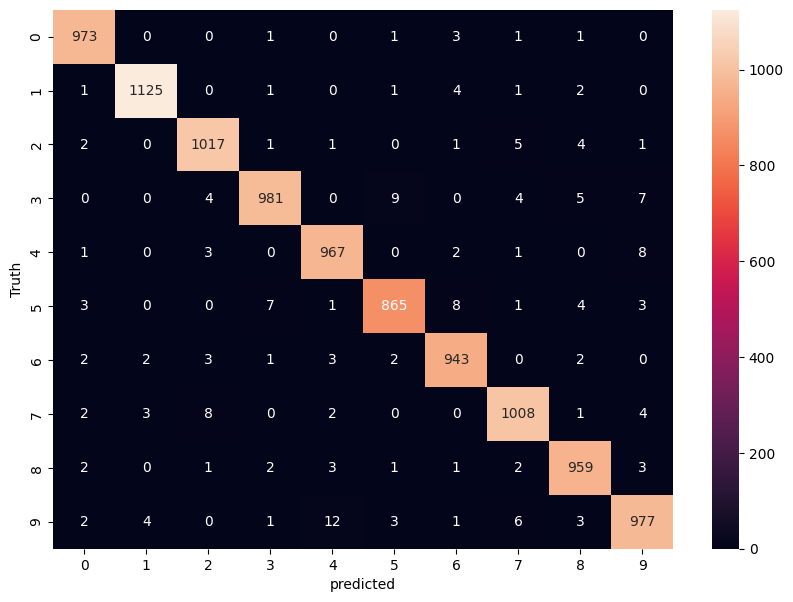

In [32]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')